In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)



In [44]:
# Load your dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('E:\DATA Science\Machine Learning\oil_spill.csv')
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


Q1) Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.

In [3]:
# Check for missing values
print(data.isnull().sum())

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64


In [4]:
# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with the actual target column
y = data['target']

In [5]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Feature scaling (important for models like SVM or Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Q2) Use various methods such as Handling null values, One-Hot Encoding, Imputation, and Scaling of Data Pre-Processing where necessary.

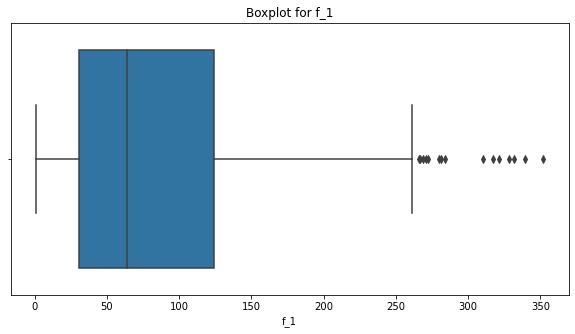

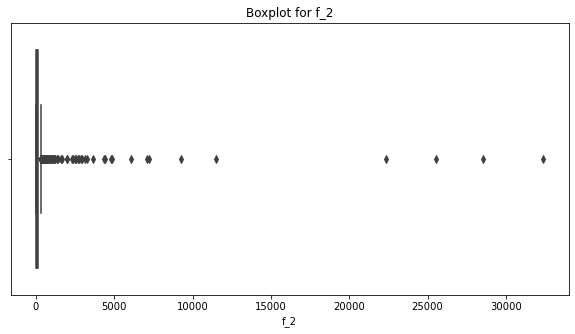

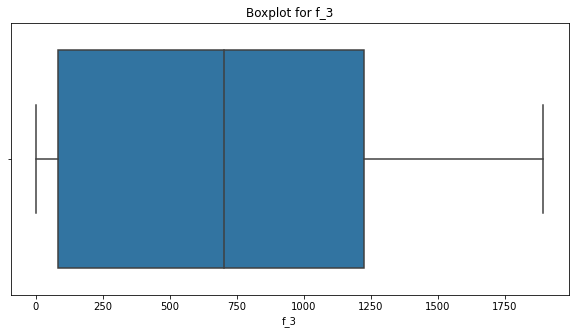

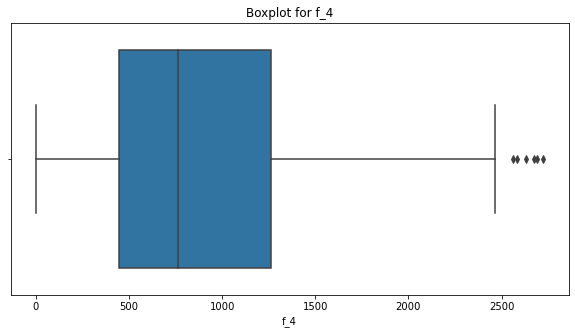

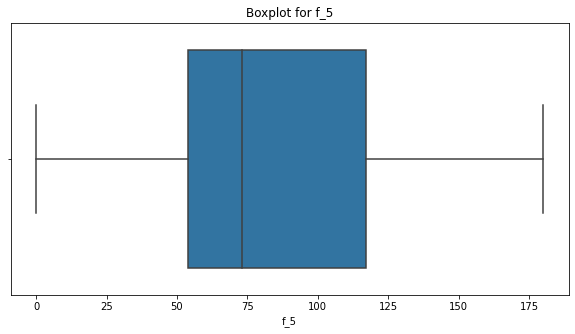

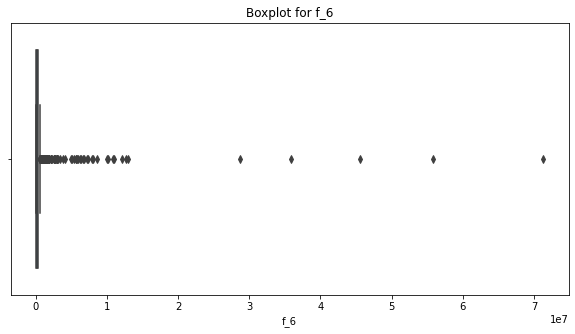

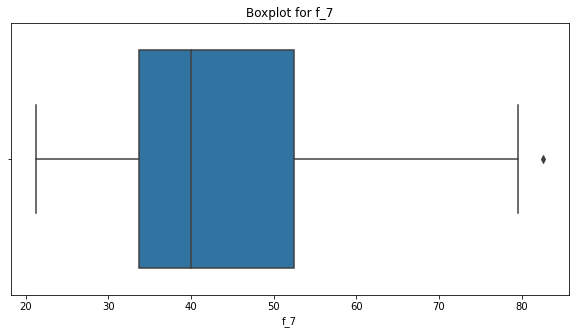

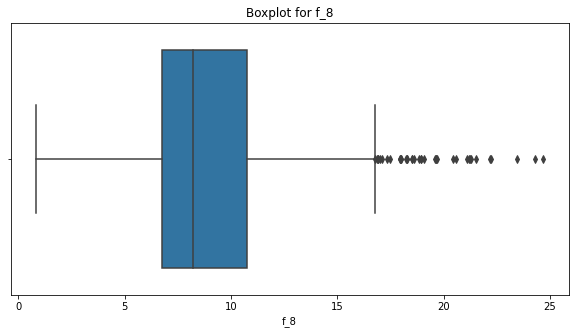

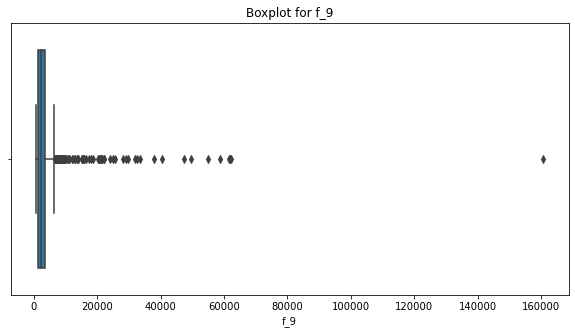

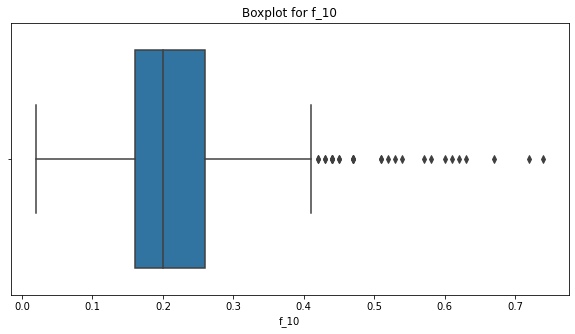

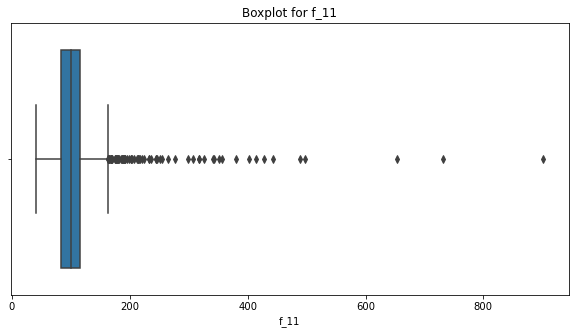

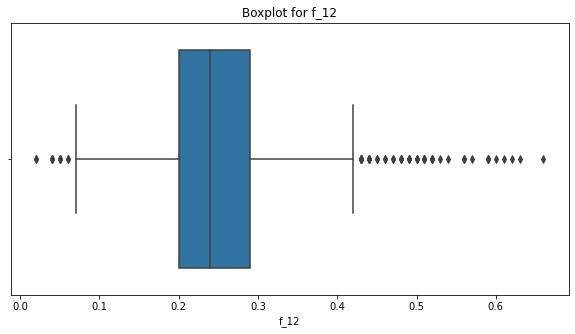

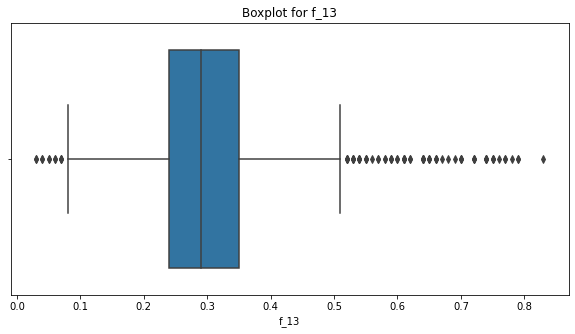

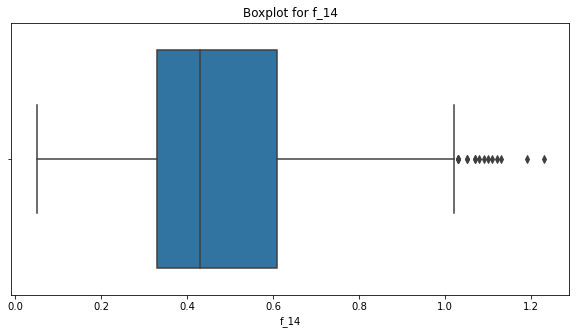

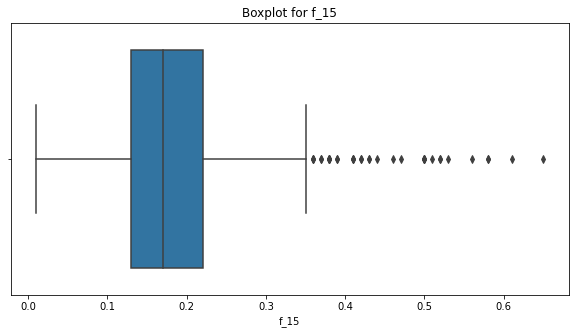

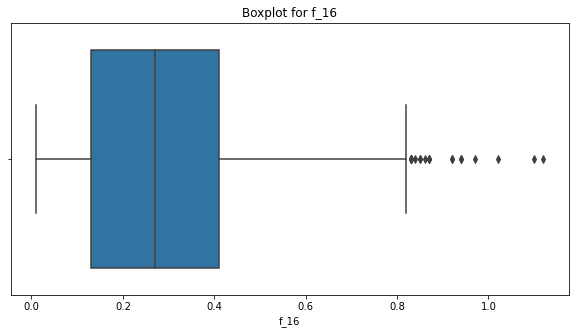

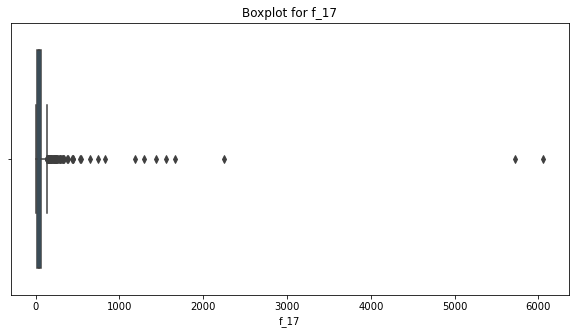

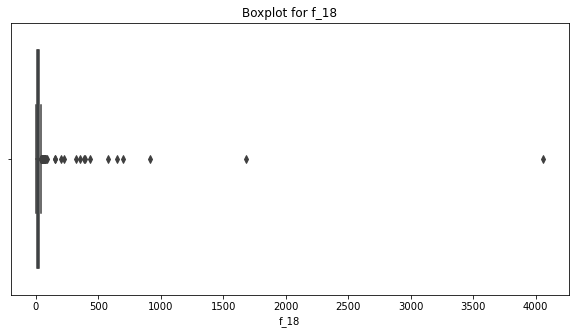

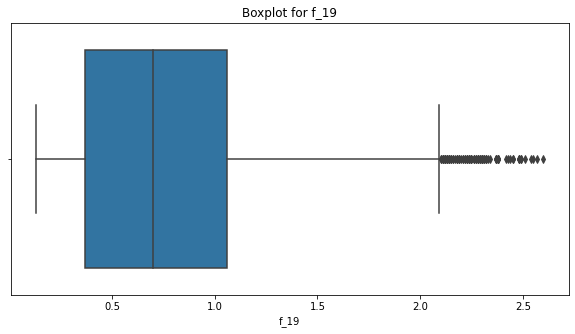

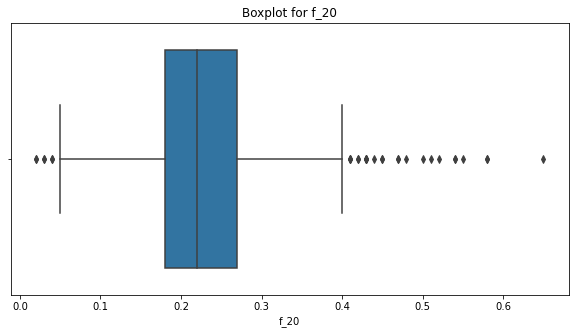

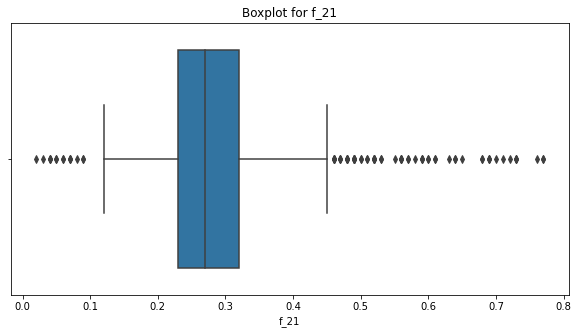

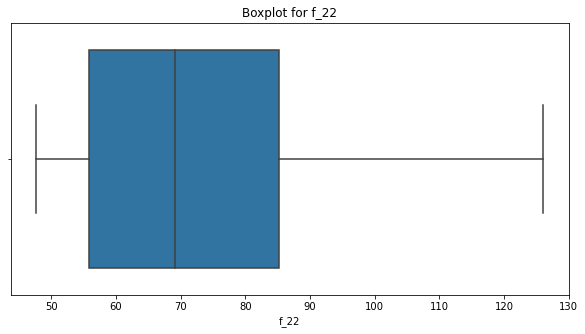

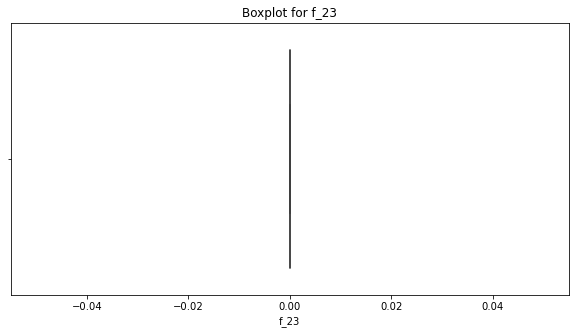

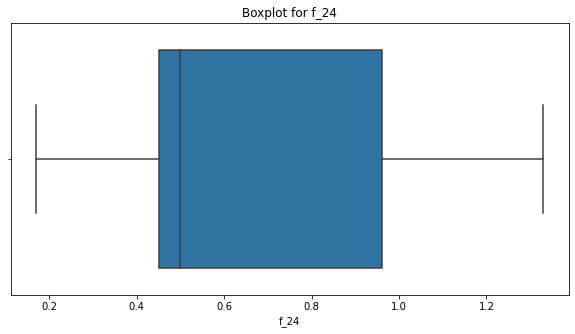

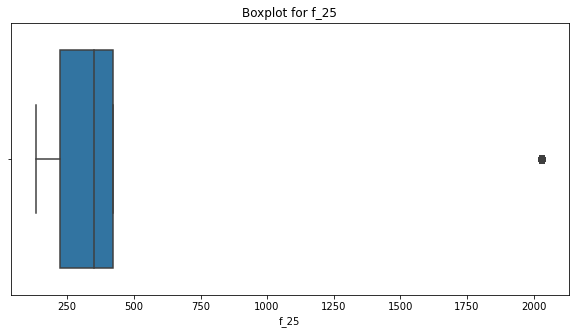

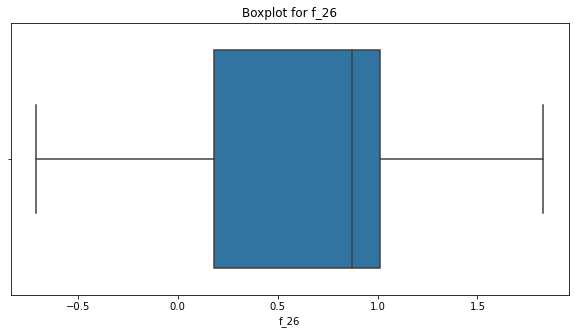

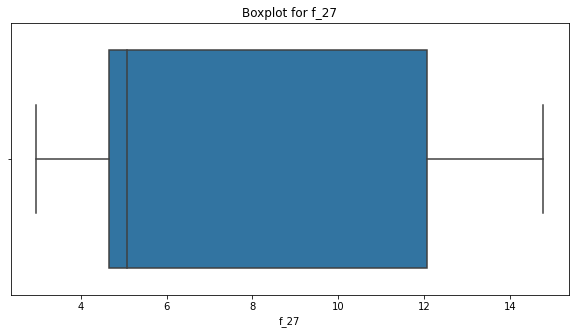

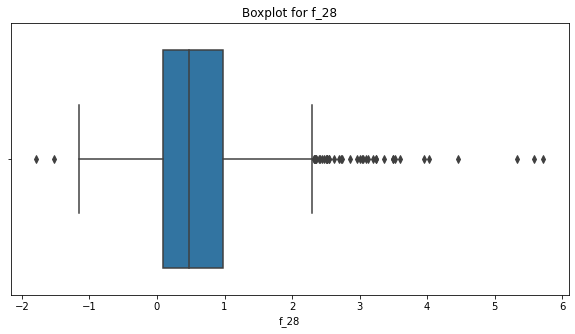

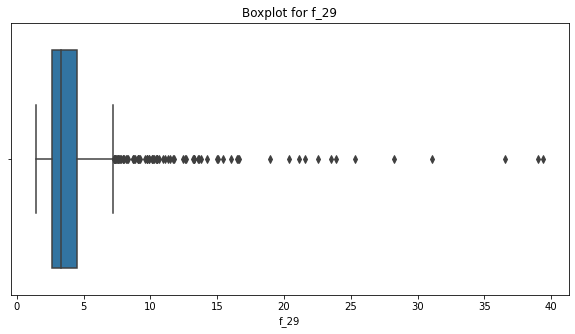

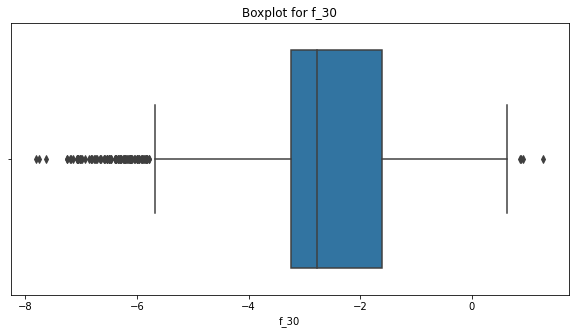

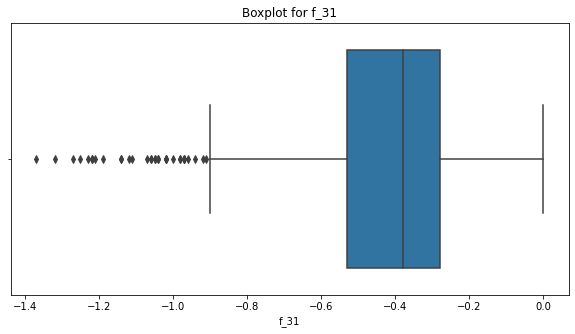

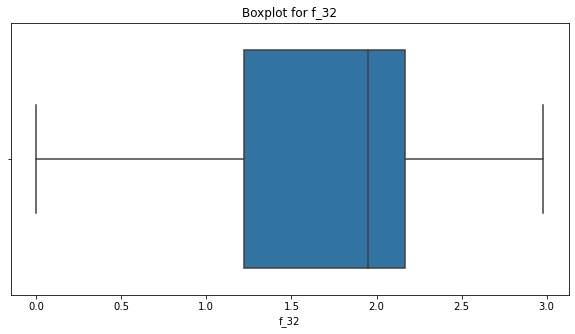

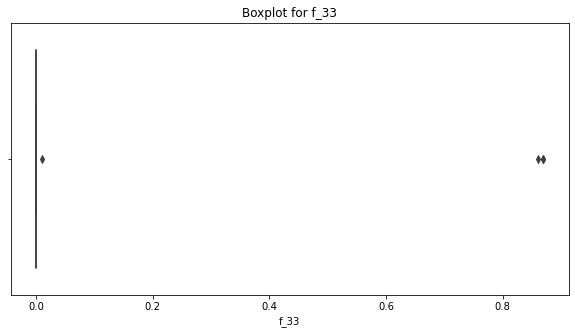

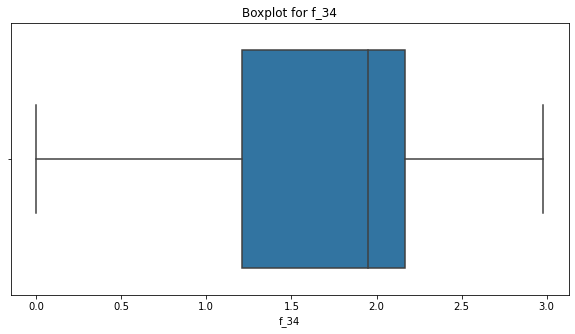

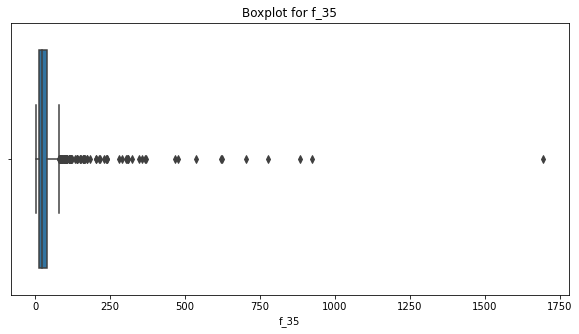

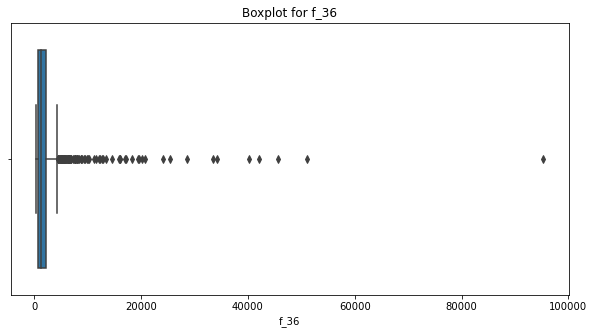

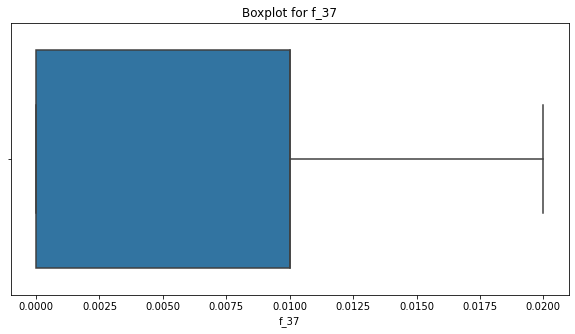

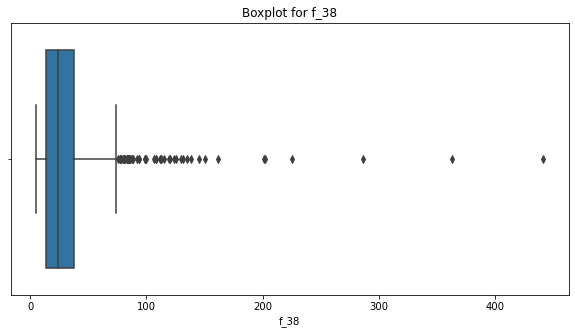

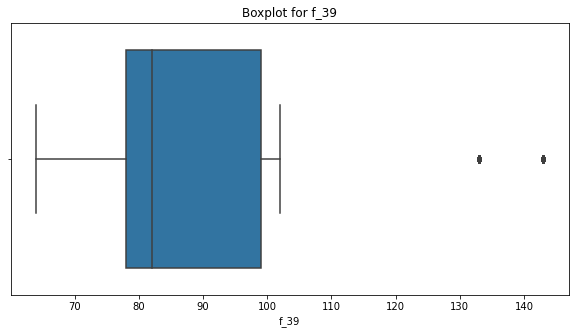

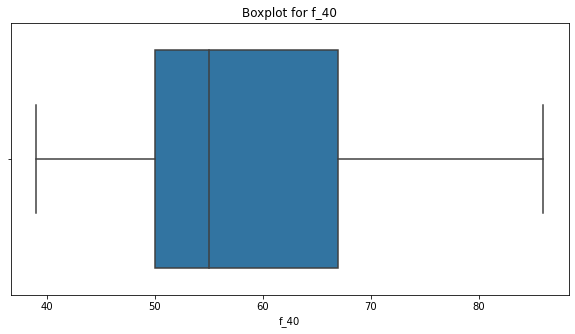

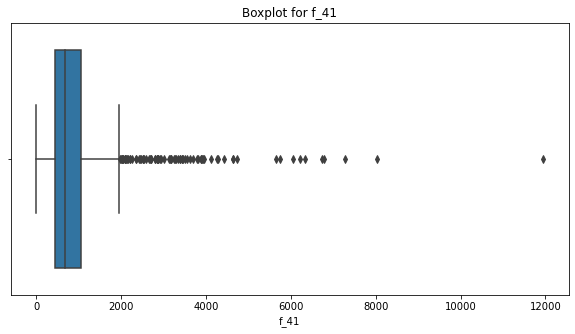

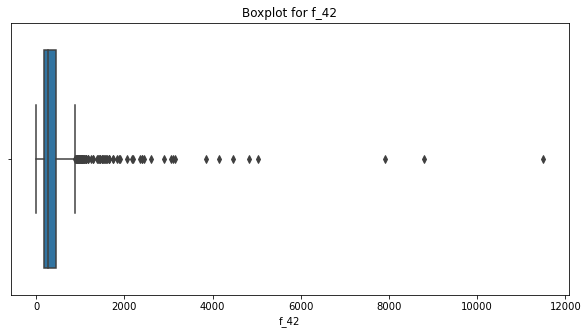

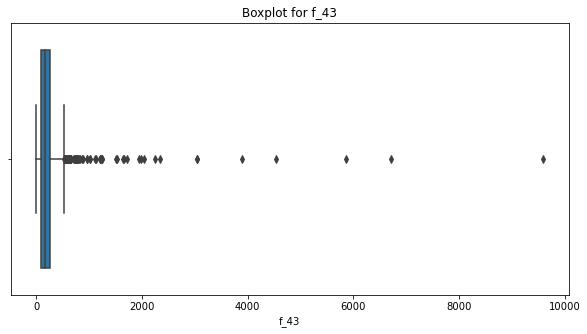

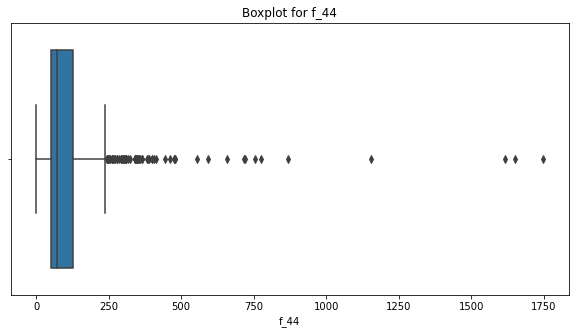

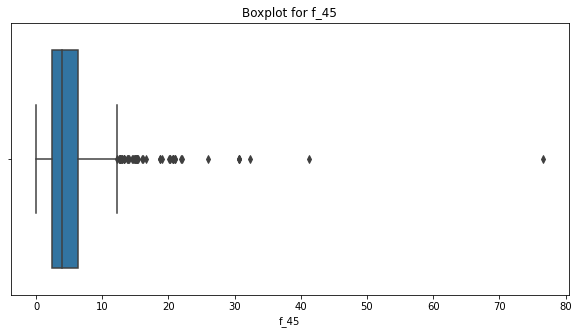

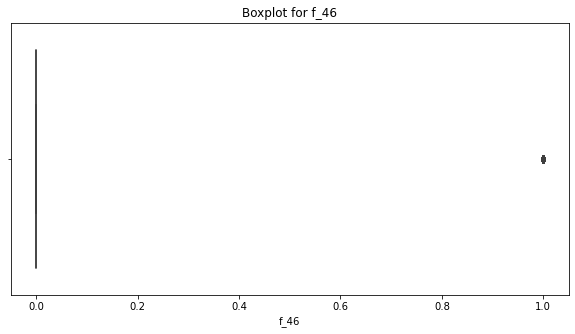

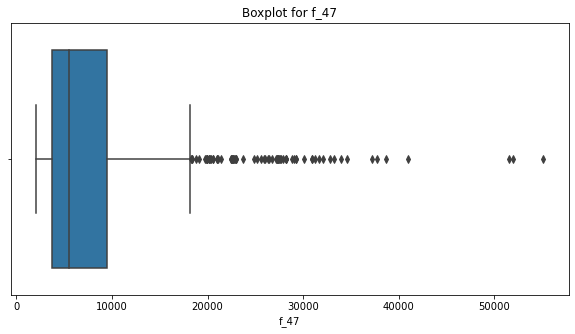

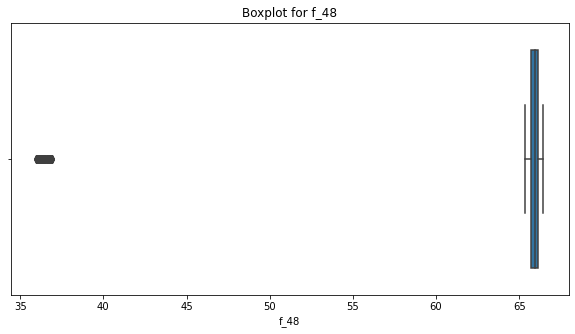

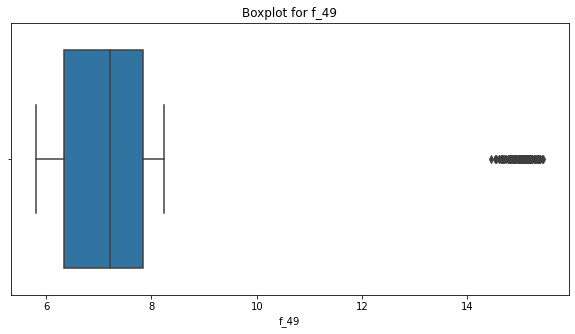

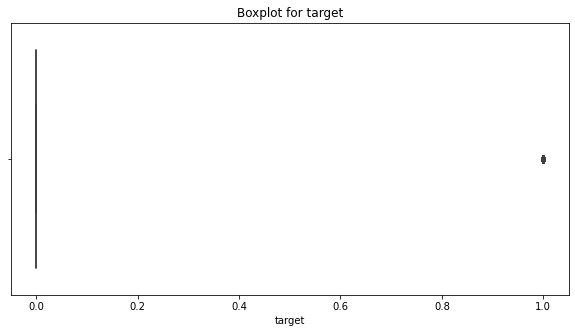

In [8]:
# Check for outliers using boxplots
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [9]:
np.float = float

In [10]:
# Option: Remove outliers based on some threshold (e.g., using IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Filtering out the outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

Q3) Deriving Insights from the Dataset.


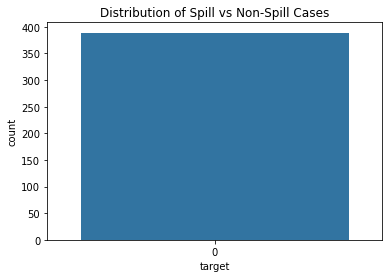

Percentage of each class (Spill vs Non-Spill):
 0    100.0
Name: target, dtype: float64


In [12]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Spill vs Non-Spill Cases')
plt.show()

# Calculate percentage of each class
spill_percentage = data['target'].value_counts(normalize=True) * 100
print("Percentage of each class (Spill vs Non-Spill):\n", spill_percentage)

In [13]:
np.bool = np.bool_

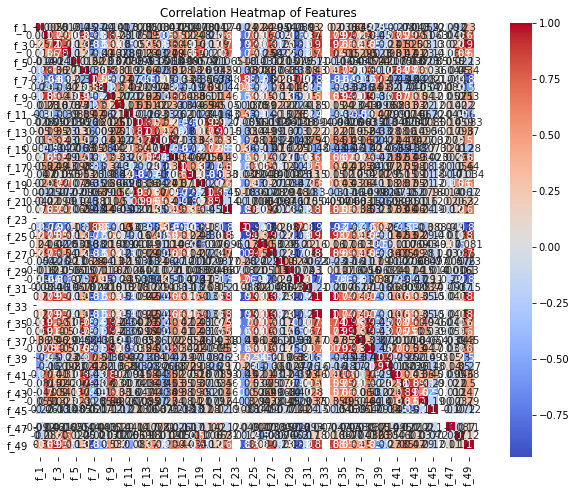

In [14]:
# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Fit a Random Forest model to get feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

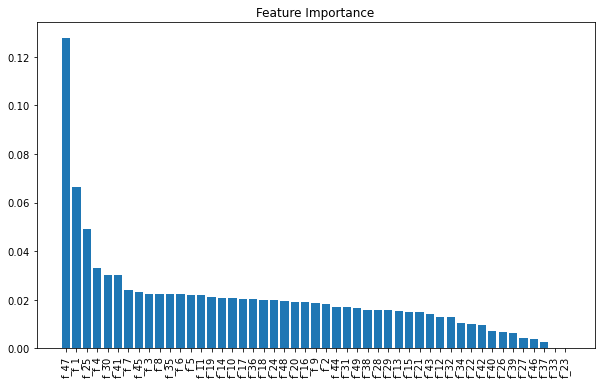

In [17]:
# Feature importance plot
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), data.columns[indices], rotation=90)
plt.show()

In [18]:
# Get descriptive statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

              f_1         f_2          f_3          f_4         f_5  \
count  389.000000  389.000000   389.000000   389.000000  389.000000   
mean   101.275064   54.768638   649.934781   749.069614   81.807198   
std     59.376650   48.360469   626.261977   419.522138   44.770392   
min      3.000000   10.000000     3.770000    11.130000    0.000000   
25%     53.000000   14.000000    60.080000   435.500000   53.000000   
50%     88.000000   39.000000   264.940000   631.530000   72.000000   
75%    150.000000   81.000000  1191.950000  1003.240000  109.000000   
max    261.000000  219.000000  1893.080000  1882.560000  180.000000   

                 f_6         f_7         f_8          f_9        f_10  ...  \
count     389.000000  389.000000  389.000000   389.000000  389.000000  ...   
mean   191179.691517   47.102905    8.998483  1932.388175    0.194293  ...   
std    107110.907325   12.218028    2.884779  1044.743537    0.048972  ...   
min     81000.000000   25.180000    4.180000   6

In [ ]:
sns.pairplot(data, hue='target')  # Replace 'target' with the actual target column name
plt.show()

Q4) Apply various Machine Learning techniques to predict the output in the target column, make use of Bagging and Ensemble as required, and find the best model by evaluating the model using Model evaluation techniques.

In [26]:
# Import necessary libraries for modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
#import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return accuracy, precision, recall, f1, roc_auc

In [27]:
# Logistic Regression Model
log_reg = LogisticRegression()

# Evaluate the model
print("Logistic Regression Evaluation:")
evaluate_model(log_reg, X_train, X_test, y_train, y_test)

Logistic Regression Evaluation:
Accuracy: 0.9681
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
ROC-AUC: 0.9570


(0.9680851063829787, 0.5, 0.5, 0.5, 0.956959706959707)

In [28]:
# Decision Tree Model
dt = DecisionTreeClassifier()

# Evaluate the model
print("\nDecision Tree Evaluation:")
evaluate_model(dt, X_train, X_test, y_train, y_test)



Decision Tree Evaluation:
Accuracy: 0.9628
Precision: 0.4444
Recall: 0.6667
F1 Score: 0.5333
ROC-AUC: 0.8196


(0.9627659574468085,
 0.4444444444444444,
 0.6666666666666666,
 0.5333333333333333,
 0.8195970695970695)

In [29]:
# Random Forest Model
rf = RandomForestClassifier()

# Evaluate the model
print("\nRandom Forest Evaluation:")
evaluate_model(rf, X_train, X_test, y_train, y_test)



Random Forest Evaluation:
Accuracy: 0.9681
Precision: 0.5000
Recall: 0.3333
F1 Score: 0.4000
ROC-AUC: 0.9785


(0.9680851063829787, 0.5, 0.3333333333333333, 0.4, 0.9784798534798534)

In [30]:
# XGBoost Model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Evaluate the model
print("\nXGBoost Evaluation:")
evaluate_model(xgb_clf, X_train, X_test, y_train, y_test)


XGBoost Evaluation:


C:\Users\hp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9681
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
ROC-AUC: 0.9872


(0.9680851063829787, 0.5, 0.5, 0.5, 0.9871794871794871)

In [31]:
# Bagging Classifier using Decision Trees as base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Evaluate the model
print("\nBagging Classifier (Decision Tree) Evaluation:")
evaluate_model(bagging_clf, X_train, X_test, y_train, y_test)


Bagging Classifier (Decision Tree) Evaluation:


C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9787
Precision: 0.6250
Recall: 0.8333
F1 Score: 0.7143
ROC-AUC: 0.9950


(0.9787234042553191,
 0.625,
 0.8333333333333334,
 0.7142857142857143,
 0.99496336996337)

In [32]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation and return the mean score
def cross_val_evaluation(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# Models for comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
}

Q5) Save the best model and Load the model

In [34]:
import joblib

# Assuming the best model is RandomForestClassifier 
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [35]:
# Load the saved model from the file
loaded_model = joblib.load('best_model.pkl')

# Use the loaded model for prediction or evaluation
y_pred = loaded_model.predict(X_test)

# Evaluate loaded model (for example, accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.4f}")

Accuracy of the loaded model: 0.9787


Q6) Take the original data set and make another dataset by randomly
picking 20 data points from the oil spill dataset and applying the saved
model to the same.

In [36]:
# Assuming 'data' is your original dataset and 'X_test' is scaled
random_sample = data.sample(n=20, random_state=42)

In [38]:
X_random_sample = random_sample.drop('target', axis=1) 

In [39]:
X_random_sample_scaled = scaler.transform(X_random_sample)

In [40]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')


In [41]:
# Apply the model to predict the outcome of the random sample
predictions = loaded_model.predict(X_random_sample_scaled)


In [42]:
# Combine the random sample data with predictions
random_sample['Predicted_Spill'] = predictions
print(random_sample)

     f_1  f_2      f_3      f_4  f_5     f_6    f_7    f_8     f_9  f_10  ...  \
721   74   13    60.08   658.69  103  105300  75.00  13.40  1011.0  0.18  ...   
177  170   58  1547.69  1730.60   33  145000  36.05   6.70  1750.0  0.19  ...   
406  141  130  1038.87   970.38  119  325000  37.19   9.75  2470.0  0.26  ...   
166  157   97  1666.21  1494.84  177  242500  32.96   5.60  2610.0  0.17  ...   
883  151   15   152.80   395.40   69  121500  57.00   7.23  1064.0  0.13  ...   
424  174   52   884.87   921.15  109  130000  42.38   8.41  1810.0  0.20  ...   
387  118   50  1400.20   943.12  172  125000  38.98   6.69  1580.0  0.17  ...   
144  134   54  1766.35   784.69  108  135000  36.06   5.40  1820.0  0.15  ...   
336   46   96  1166.95   824.82   77  240000  39.69   7.55  2450.0  0.19  ...   
381  109   59   810.47   933.86   39  147500  38.83   7.03  1380.0  0.18  ...   
919  187   12     5.25   244.25   59   97200  54.58  10.98   868.0  0.20  ...   
757   25   18    78.11   456